In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter 
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
veri=pd.read_csv("olimpiyatlar.csv")
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014.0,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948.0,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8313 entries, 0 to 8312
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      8313 non-null   object 
 1   cinsiyet  8313 non-null   object 
 2   yas       8313 non-null   float64
 3   boy       8313 non-null   float64
 4   kilo      8313 non-null   float64
 5   takim     8313 non-null   object 
 6   uok       8312 non-null   object 
 7   yil       8312 non-null   float64
 8   sezon     8312 non-null   object 
 9   sehir     8312 non-null   object 
 10  spor      8312 non-null   object 
 11  etkinlik  8312 non-null   object 
 12  madalya   8312 non-null   object 
dtypes: float64(4), object(9)
memory usage: 844.4+ KB


In [4]:
#ÖZET/PİVOT TABLO 
veri_pivot=veri.pivot_table(index="madalya", columns="cinsiyet",values=["boy","kilo","yas"],
                           aggfunc={"boy":np.mean,"kilo":np.mean,"yas":[min,max,np.std]})
veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.612583  180.085996  62.672111  77.924203  52.0  72.0  13.0   
Gold      169.586191  180.415178  62.089634  78.250351  43.0  57.0  13.0   
Silver    170.875837  180.370103  63.122766  78.514476  55.0  73.0  14.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    14.0  5.108200  6.020010  
Gold      13.0  4.951663  6.002479  
Silver    14.0  5.547627  6.055714

In [5]:
#AYKIRI DEĞER TESPİTİ
def anomaliaDetection(data_frame,ozellik):
    outlier_indices=[] #aykırı değerler bu listenin içine 

    for c in ozellik:
        #1. çeyrek
        Q1=np.percentile(data_frame[c],25)
        #3. çeyrek
        Q3=np.percentile(data_frame[c],75)
        #IQR = INTER QUERTILE RANGE/ÇEYREKLER ARASI AÇIKLIK 
        IQR=Q3-Q1
        #aykırı değer için ek adım miktarı 
        outlier_step=1.5*IQR
        #aykırı değeri ve bulunduğu indeksin tespiti
        outlier_list_col=data_frame[(data_frame[c]<Q1-outlier_step) | (data_frame[c]> Q3 + outlier_step)].index
        #tespit edilen indeksleri depolama
        outlier_indices.extend(outlier_list_col)
        
    #eşsiz aykırı değerlerin kendilerini bulma
    outlier_indices=Counter(outlier_indices)
    #v adet sutünda farklı değer ise bunu aykırı kabul edelim
    multiple_outliers=list(i for i, v in outlier_indices.items() if v >1)
    return multiple_outliers

In [6]:
veri_anomali=veri.loc[anomaliaDetection(veri,["yas","kilo","boy"])]
veri_anomali.spor.value_counts()

spor
Basketball    13
Gymnastics     8
Shooting       3
Water Polo     2
Handball       1
Name: count, dtype: int64

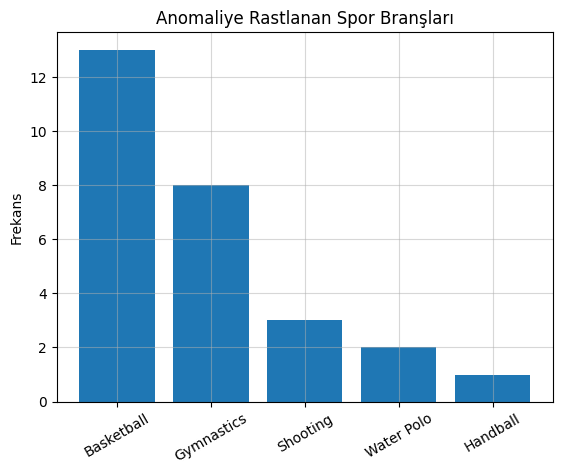

In [7]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index,veri_anomali.spor.value_counts().values)
plt.xticks(rotation=30)
plt.title("Anomaliye Rastlanan Spor Branşları")
plt.ylabel("Frekans")
plt.grid(True,alpha=0.5)
plt.show()

In [8]:
veri_gym=veri_anomali[veri_anomali.spor=="Gymnastics"]
veri_gym

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
1736,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004.0,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
2802,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996.0,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
3187,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000.0,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
6486,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984.0,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
7311,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008.0,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
7312,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012.0,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
7822,Yelena Vladimirovna Dolgopolova,F,16.0,149.0,38.0,Russia,RUS,1996.0,Summer,Atlanta,Gymnastics,Gymnastics Women's Team All-Around,Silver
8029,Gabriela Drgoi,F,15.0,146.0,37.0,Romania,ROU,2008.0,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Bronze


In [9]:
veri_gym.etkinlik.value_counts()

etkinlik
Gymnastics Women's Team All-Around    6
Gymnastics Women's Uneven Bars        1
Gymnastics Women's Balance Beam       1
Name: count, dtype: int64

In [10]:
veri_basketbol=veri_anomali[veri_anomali.spor== "Basketball"]
veri_basketbol

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
1086,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988.0,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
1087,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
1631,"Vincent Lamont ""Vin"" Baker",M,28.0,207.0,109.0,United States,USA,2000.0,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
2848,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980.0,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
2849,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988.0,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
3229,Dejan Bodiroga,M,23.0,205.0,110.0,Serbia and Montenegro,SCG,1996.0,Summer,Atlanta,Basketball,Basketball Men's Basketball,Silver
3465,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004.0,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
3466,"Carlos Austin Boozer, Jr.",M,26.0,206.0,117.0,United States,USA,2008.0,Summer,Beijing,Basketball,Basketball Men's Basketball,Gold
3872,Romanas Brazdauskis,M,28.0,204.0,108.0,Lithuania,LTU,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,Bronze
5486,Roberto Chiacig,M,29.0,210.0,118.0,Italy,ITA,2004.0,Summer,Athina,Basketball,Basketball Men's Basketball,Silver


In [11]:
veri_basketbol.etkinlik.value_counts()

etkinlik
Basketball Men's Basketball    13
Name: count, dtype: int64

In [12]:
#YILLARA GÖRE DEĞİŞİMLER 
veri_zaman=veri.copy()
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920.0,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014.0,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948.0,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [13]:
unique_years=veri_zaman.yil.unique()
unique_years

array([1900., 1920., 2014., 1948., 1952., 1992., 1994., 2002., 2006.,
       2008., 1988., 1996., 1960., 1912., 1956., 2016., 2012., 2000.,
       2004., 1980., 1984., 1936., 1906., 1964., 1972., 1924., 1904.,
       1932., 1928., 1968., 1976., 2010., 1908., 1998., 1896.,   nan])

In [14]:
#OLİMPİYATLARIN YILLARINI SIRALAMA
sirali=np.sort(veri_zaman.yil.unique())
sirali

array([1896., 1900., 1904., 1906., 1908., 1912., 1920., 1924., 1928.,
       1932., 1936., 1948., 1952., 1956., 1960., 1964., 1968., 1972.,
       1976., 1980., 1984., 1988., 1992., 1994., 1996., 1998., 2000.,
       2002., 2004., 2006., 2008., 2010., 2012., 2014., 2016.,   nan])

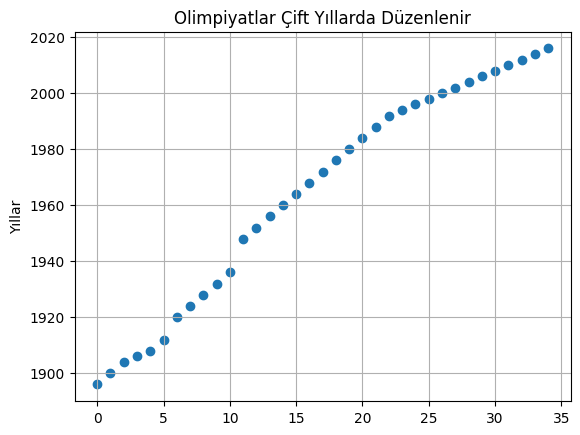

In [15]:
plt.figure()
#SAÇILIM GRAFİĞİ
plt.scatter(range(len(sirali)),sirali)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar Çift Yıllarda Düzenlenir")
plt.show()

In [16]:
#veri içerisinde bulunan yıl değerlerini datetime veri tipine dönüştürme
tarih_saat_nesnesi= pd.to_datetime(veri_zaman["yil"],format='%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


0   1900-01-01
1   1920-01-01
2   1920-01-01
Name: yil, dtype: datetime64[ns]

In [20]:
#SÜTUN EKLEME
veri_zaman["tarih_saat"]= tarih_saat_nesnesi
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya,tarih_saat
tarih_saat,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,NaT
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,NaT
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,NaT


In [18]:
#veri_zaman değişkeninin ana indeksini, datetime tipi olan tarih_saat değerine güncelleme
veri_zaman=veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"],axis=1,inplace=True)

In [29]:
veri_zaman

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya,tarih_saat
tarih_saat,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.00,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1920-01-01
1920-01-01,Arvo Ossian Aaltonen,M,30.00,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
1920-01-01,Arvo Ossian Aaltonen,M,30.00,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01
2014-01-01,Juhamatti Tapio Aaltonen,M,28.00,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,1920-01-01
1948-01-01,Paavo Johannes Aaltonen,M,28.00,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1920-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984-01-01,Cornel Duru,M,27.00,180.00,78.00,Romania,ROU,Summer,Los Angeles,Handball,Handball Men's Handball,Bronze,1920-01-01
1964-01-01,"Philip Marshall ""Phil"" Durbrow",M,23.00,191.00,86.00,United States,USA,Summer,Tokyo,Rowing,Rowing Men's Coxless Fours,Bronze,1920-01-01
1924-01-01,Bohumil Durdis,M,21.00,164.92,67.00,Czechoslovakia,TCH,Summer,Paris,Weightlifting,Weightlifting Men's Lightweight,Bronze,1920-01-01
